In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cleaned data to use:

df= pd.read_csv("/content/sample_data/cleaned_cosmo_chemicals.csv")
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

- Efficacy: Best-to-worst (higher = better)
- Safety: Worst-to-best (higher = safer)
- Sustainability: Best-to-worst (higher = better)

In [ ]:
# Define the function to set safety scores based on HazardType without randomness
def assign_safety_score(hazard_type):
    if hazard_type == 'Not Hazardous':
        return 10  # Least hazardous
    elif hazard_type == 'Confirmed Carcinogen':
        return 1  # Most hazardous
    elif hazard_type == 'Suspected Carcinogen':
        return 3  # Moderately hazardous
    elif hazard_type == 'Reproductive Toxicant':
        return 2  # Significant hazard
    elif hazard_type == 'Potentially Hazardous':
        return 5  # Moderate hazard
    else:
        return 7  # Default for unspecified hazard

# Define efficacy and sustainability scores for each chemical in hazard_mapping
efficacy_scores = {
    'Titanium dioxide': 6,
    'Distillates (coal tar)': 4,
    'Estragole': 5,
    'Cocamide diethanolamine': 7,
    'Toluene': 3,
    'Chromium (hexavalent compounds)': 3,
    'Retinol': 10,
    'Retinol/retinyl esters, when in daily dosages': 8,
    'Vitamin A': 9,
    'Vitamin A palmitate': 9,
    'Butylated hydroxyanisole': 5,
    'Coffea arabica extract': 8,
    'Lauramide diethanolamine': 6,
    'Coffee': 7,
    'Silica, crystalline (airborne particles of respirable size)': 3,
    'Carbon black (airborne, unbound particles of respirable size)': 4,
    'Carbon black': 4,
    'Genistein (purified)': 7,
    'Progesterone': 6,
    '2,4-Hexadienal (89% trans, trans isomer; 11% cis isomer)': 5,
    'Methyleugenol': 5,
    'Carbon-black extracts': 4,
    'Retinyl palmitate': 9,
    'o-Phenylphenol': 5,
    'Acrylamide': 2,
    'Formaldehyde (gas)': 2,
    'Ginkgo biloba extract': 8,
    'Mica': 7,
    'Ethylene glycol': 6,
    'Acetic acid, retinyl ester': 8,
    'Ethyl acrylate': 3,
    'Trade Secret': 5,
    'Methanol': 6,
    'Mineral oils, untreated and mildly treated': 7,
    'Diethanolamine': 4,
    'TEA-Lauryl Sulfate': 6,
    'Retinyl acetate': 9,
    'Lead acetate': 2,
    'Talc': 7,
    'Triethanolamine': 6,
    'o-Phenylenediamine and its salts': 4,
    'Safrole': 5,
    'Styrene': 5
}

sustainability_scores = {
    'Titanium dioxide': 8,
    'Distillates (coal tar)': 3,
    'Estragole': 6,
    'Cocamide diethanolamine': 7,
    'Toluene': 2,
    'Chromium (hexavalent compounds)': 2,
    'Retinol': 9,
    'Retinol/retinyl esters, when in daily dosages': 7,
    'Vitamin A': 9,
    'Vitamin A palmitate': 8,
    'Butylated hydroxyanisole': 4,
    'Coffea arabica extract': 7,
    'Lauramide diethanolamine': 6,
    'Coffee': 7,
    'Silica, crystalline (airborne particles of respirable size)': 3,
    'Carbon black (airborne, unbound particles of respirable size)': 4,
    'Carbon black': 5,
    'Genistein (purified)': 8,
    'Progesterone': 6,
    '2,4-Hexadienal (89% trans, trans isomer; 11% cis isomer)': 4,
    'Methyleugenol': 5,
    'Carbon-black extracts': 4,
    'Retinyl palmitate': 9,
    'o-Phenylphenol': 6,
    'Acrylamide': 3,
    'Formaldehyde (gas)': 2,
    'Ginkgo biloba extract': 8,
    'Mica': 9,
    'Ethylene glycol': 6,
    'Acetic acid, retinyl ester': 8,
    'Ethyl acrylate': 3,
    'Trade Secret': 5,
    'Methanol': 7,
    'Mineral oils, untreated and mildly treated': 6,
    'Diethanolamine': 4,
    'TEA-Lauryl Sulfate': 6,
    'Retinyl acetate': 8,
    'Lead acetate': 3,
    'Talc': 7,
    'Triethanolamine': 6,
    'o-Phenylenediamine and its salts': 5,
    'Safrole': 5,
    'Styrene': 4
}

In [ ]:
# Add new columns to dataset
df['Efficacy'] = df['ChemicalName'].map(efficacy_scores).fillna(5)
df['Safety'] = df['HazardType'].apply(assign_safety_score)
df['Sustainability'] = df['ChemicalName'].map(sustainability_scores).fillna(5)


print(df[['ChemicalName', 'Efficacy', 'HazardType', 'Safety', 'Sustainability']].head())

             ChemicalName  Efficacy            HazardType  Safety  \
0        Titanium dioxide       6.0         Not Hazardous      10   
1  Distillates (coal tar)       4.0  Confirmed Carcinogen       1   
2               Estragole       5.0  Suspected Carcinogen       3   
3        Titanium dioxide       6.0         Not Hazardous      10   
4        Titanium dioxide       6.0         Not Hazardous      10   

   Sustainability  
0             8.0  
1             3.0  
2             6.0  
3             8.0  
4             8.0  


In [ ]:
## prop 65 (look up for cali standards and make scores more accurate)

In [ ]:
# which risky ingredients to replace with safer, more sustainable ones, supporting safer product formulations...

In [ ]:
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-10-6b1f45e5016e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_counts.index, y=categorical_counts.values, palette="coolwarm")


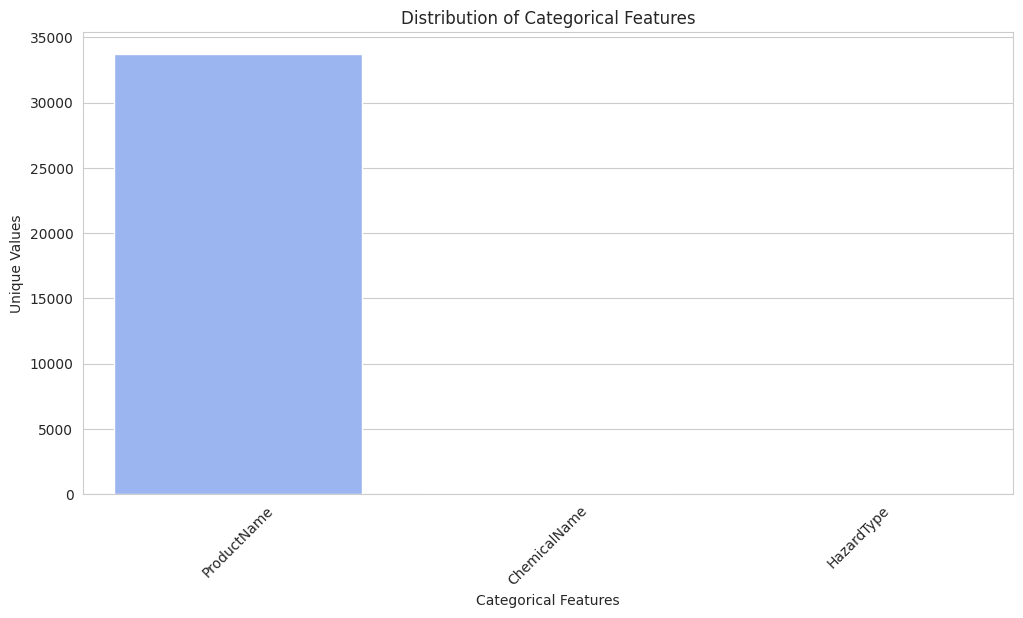

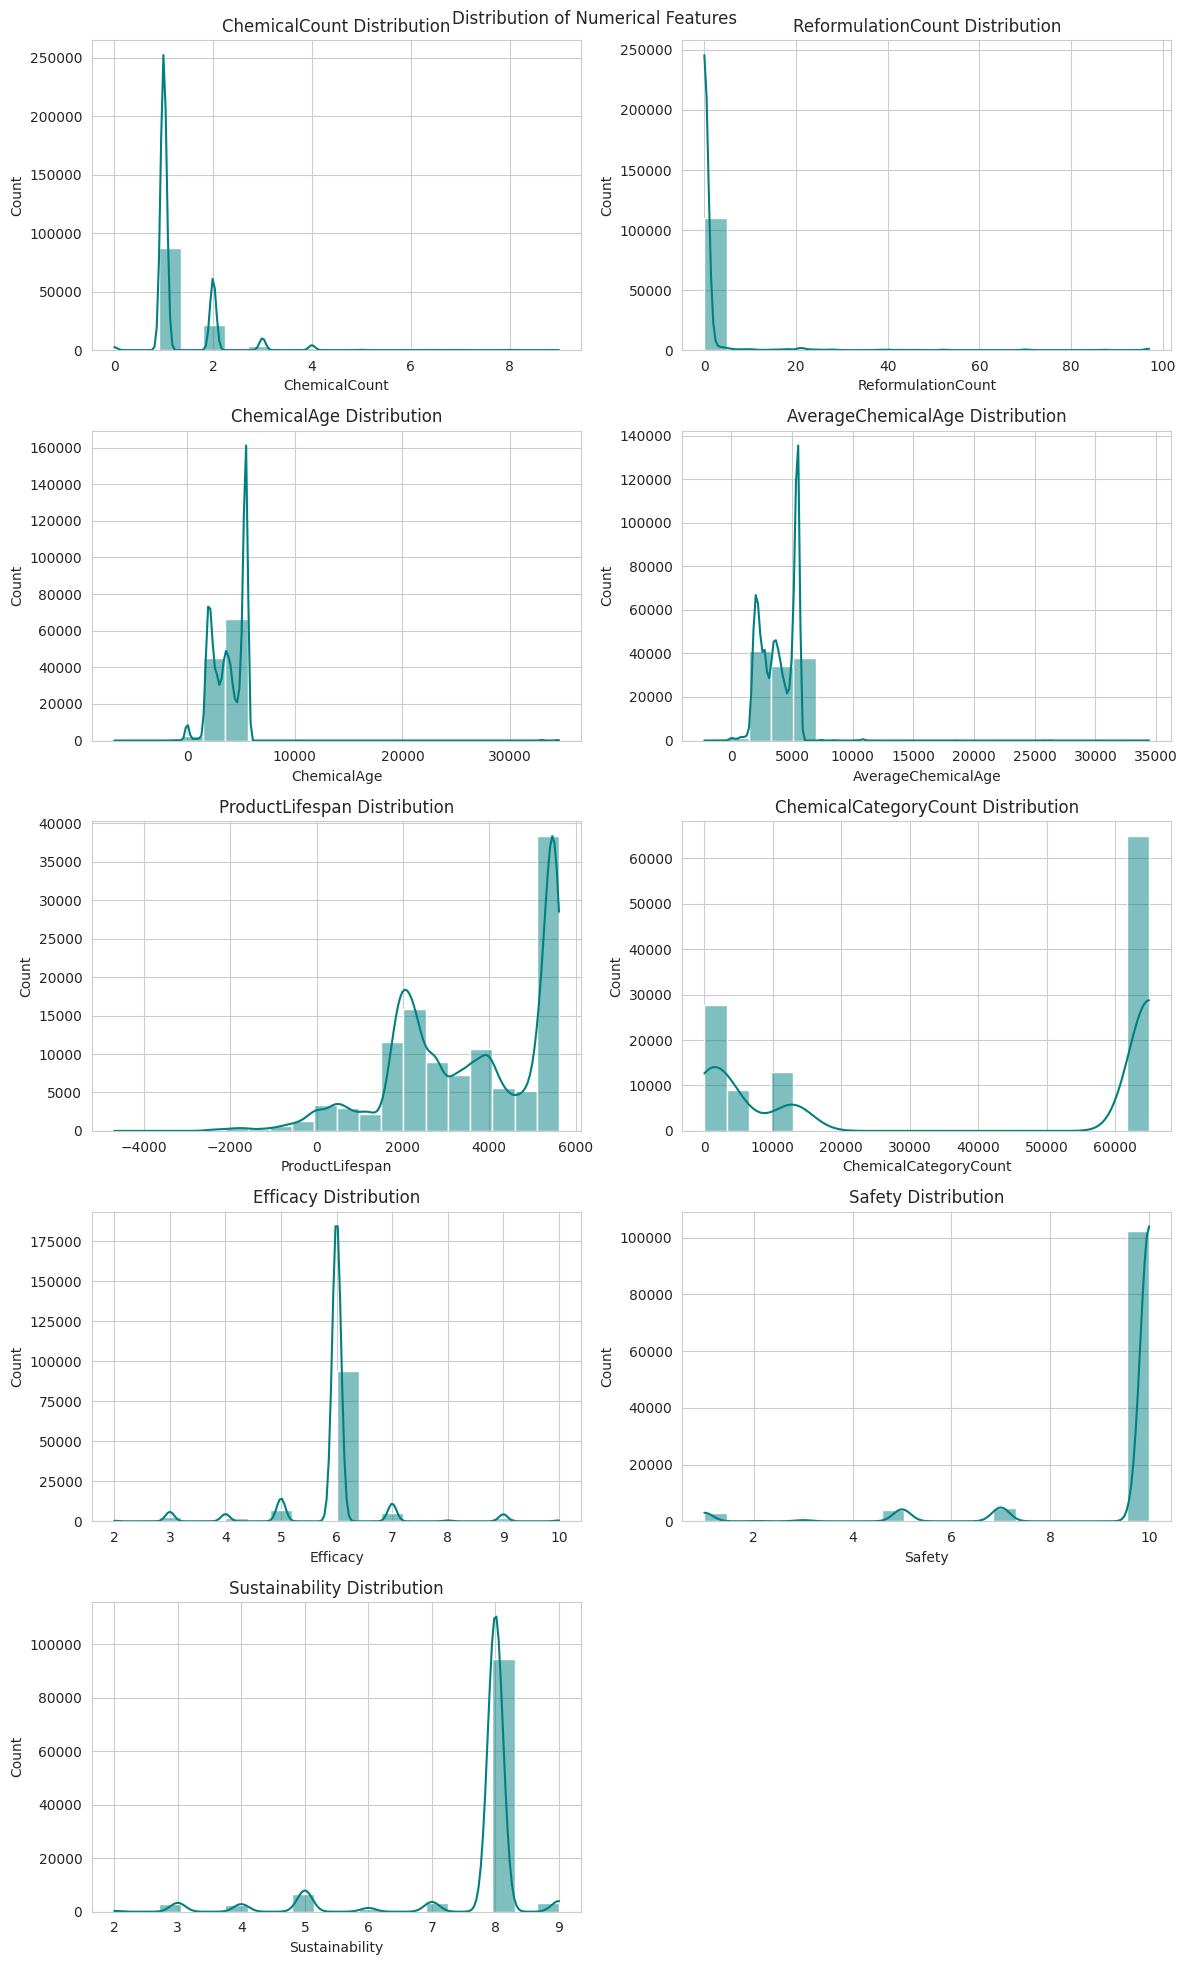

In [ ]:
# Set the style
sns.set_style("whitegrid")

# Identify categorical and numerical columns
categorical_cols = ["ProductName", "ChemicalName", "HazardType"]  # Example categorical columns
numerical_cols = ["ChemicalCount", "ReformulationCount", "ChemicalAge", "AverageChemicalAge", "ProductLifespan", "ChemicalCategoryCount", "Efficacy", "Safety", "Sustainability"]  # Example numerical columns

# Bar Chart: Distribution of Categorical Features
plt.figure(figsize=(12, 6))
categorical_counts = df[categorical_cols].nunique()
sns.barplot(x=categorical_counts.index, y=categorical_counts.values, palette="coolwarm")
plt.xlabel("Categorical Features")
plt.ylabel("Unique Values")
plt.title("Distribution of Categorical Features")
plt.xticks(rotation=45)
plt.show()

# Histograms: Distribution of Numerical Features
num_plots = len(numerical_cols)
rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
fig.suptitle("Distribution of Numerical Features")

axes = axes.flatten()  # Flatten in case of single row
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), bins=20, kde=True, ax=axes[i], color="teal")
    axes[i].set_title(f"{col} Distribution")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define the filename
filename = "updated_cosmo_chemicals.csv"

# Save the DataFrame as a CSV file
df.to_csv(filename, index=False)

print(f"Dataset saved as {filename}")


Dataset saved as updated_cosmo_chemicals.csv


In [ ]:
# Set the style
sns.set_style("whitegrid")

# List of numerical columns
numerical_cols = [
    "ChemicalCount", "ReformulationCount", "ChemicalAge",
    "AverageChemicalAge", "ProductLifespan", "ChemicalCategoryCount",
    "Efficacy", "Safety", "Sustainability"
]

# Loop through numerical columns and save each plot as an image
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), bins=20, kde=True, color="teal")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Save each plot as an image file
    plt.savefig(f"{col}_distribution.png", dpi=300, bbox_inches="tight")
    plt.close()

print("All histograms saved as individual images.")


All histograms saved as individual images.
